Works with MongoDb, No obsolete Data


In [1]:
import osmnx as ox
import geojson
import pandas as pd
import os

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    geojson_features = []
    for postal_code, geometry in data.items():
        if geometry.is_empty:
            continue  # Skip empty geometries

        coordinates = []

        if geometry.geom_type == 'Polygon':
            coordinates = [list(geometry.exterior.coords)]
        elif geometry.geom_type == 'MultiPolygon':
            coordinates = [list(poly.exterior.coords) for poly in geometry.geoms]
        else:
            raise ValueError(f"Unsupported geometry type: {geometry.geom_type}")

        # Update "type" to "postal_code" and add the corresponding postal code
        feature = {
            "postal_code": postal_code,
            "geometry": {
                "type": geometry.geom_type,
                "coordinates": coordinates
            }
        }

        geojson_features.append(feature)

    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

def main():
    place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

    place_postal_code_polygons = get_place_postal_code_polygons(place_input)
    place_geojson_data = format_geojson_data(place_postal_code_polygons)

    file_name = f"{place_input}_geojson_data.geojson"
    saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

    print(f"{place_input} GeoJSON data saved to {saved_file_path}")

if __name__ == "__main__":
    main()


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 183 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Germany GeoJSON data saved to c:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\Check_Out_Leon\Germany_geojson_data.geojson


Testing Data:

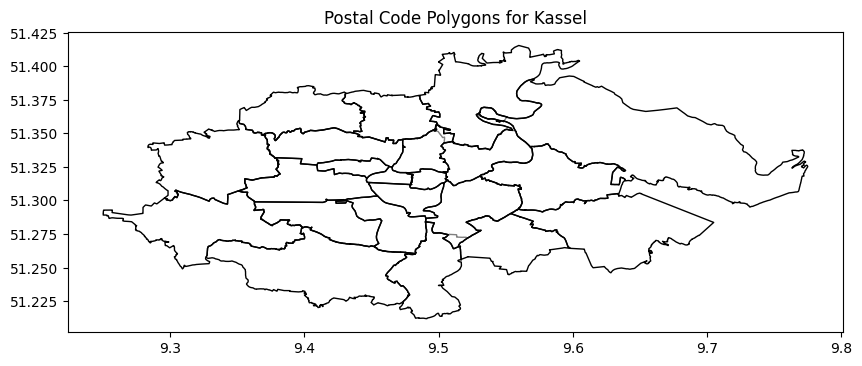

<Axes: >

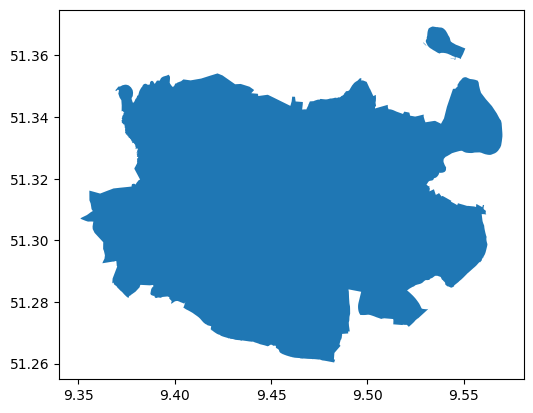

In [2]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    Returns a dictionary mapping postal codes to their respective geometries.
    """
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])
    
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Fetch city/länder boundaries using OSMnx
city_boundaries = ox.geocode_to_gdf(place_input)

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)

# Plotting the data using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
city_boundaries.plot(ax=ax, edgecolor='grey', facecolor='none')
gpd.GeoDataFrame(geometry=list(place_postal_code_polygons.values())).plot(ax=ax, edgecolor='black', facecolor='none')

# Display the plot
plt.title(f"Postal Code Polygons for {place_input}")
plt.show()

city_boundaries.plot()

In [ ]:
len(place_postal_code_polygons)

22